A notebook to determine growth rates on constant-slope strings

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from growthrates import *

# 1-Stair

In [2]:
N = 100
Steps = 1000
trials = 100
n = 1
slopes1 = np.zeros((11,trials))
ts = np.arange(Steps+1)

for t in range(trials):
    for idx, m in enumerate(np.arange(-10,12,2)):
        S = reset_S(N, m/10)
        heights = np.array([np.mean(S[:-1])])
        for i in range(Steps):
            S = stair_update_S(S, n)
            heights = np.append(heights, np.mean(S[:-1]))
        
#     plt.plot(ts, heights)
        slope, intercept,_,_,_ = stats.linregress(ts[Steps//5:],
                                              heights[Steps//5:])
#     plt.plot(ts, slope * ts + intercept)
        slopes1[idx,t] = slope*N
# plt.show()

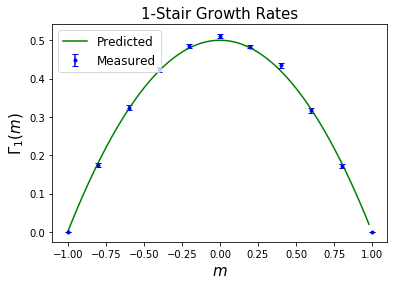

In [3]:
# Growth Rate
ms = np.arange(-1,1.2,.2)
# print(slopes1)
# print(aslopes1)
plt.errorbar(ms, np.mean(slopes1,axis=1), yerr=np.std(slopes1, axis=1)/np.sqrt(trials-1), label="Measured", fmt='.')
# plt.plot(ms,  np.average(slopes1,axis=1), label="measured")
ms = np.arange(-1,1.0,.02)
aslopes1 = (1-ms*ms)/2
plt.plot(ms, aslopes1, label="Predicted")
plt.title("1-Stair Growth Rates", fontsize=15)
plt.ylabel("$\Gamma_1(m)$", fontsize=15)
plt.xlabel("$m$", fontsize=15)
plt.legend(loc=2)
plt.savefig("../figures/growthrates/1stairRates.pdf")
plt.show()

# 2-Stair

In [4]:
N = 100
Steps = 2000
trials = 100
n = 2
slopes2 = np.zeros((11,trials))
ts = np.arange(Steps+1)

for t in range(trials):
    for idx, m in enumerate(np.arange(-10,12,2)):
        S = reset_S(N, m/10)
        heights = np.array([np.mean(S[:-1])])
        for i in range(Steps):
            S = stair_update_S(S, n)
            heights = np.append(heights, np.mean(S[:-1]))
        
#     plt.plot(ts, heights)
        slope, intercept,_,_,_ = stats.linregress(ts[Steps//5:],
                                              heights[Steps//5:])
#     plt.plot(ts, slope * ts + intercept)
        slopes2[idx,t] = slope*N/2
# plt.show()

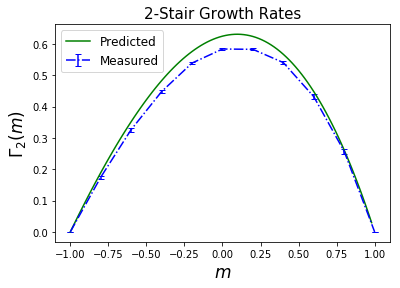

In [5]:
# Growth Rate
ms = np.arange(-1,1.2,.2)
# print(slopes1)
# print(aslopes1)
plt.errorbar(ms, np.mean(slopes2,axis=1), yerr=np.std(slopes2, axis=1)/np.sqrt(trials-1), label="Measured", fmt='-.')
# plt.plot(ms,  np.average(slopes1,axis=1), label="measured")
ms = np.arange(-1,1.0,.02)
aslopes2 = (1-ms*ms)*(5+ms)/8
plt.plot(ms, aslopes2, label="Predicted")
plt.title("2-Stair Growth Rates", fontsize=15)
plt.ylabel("$\Gamma_2(m)$", fontsize=17)
plt.xlabel("$m$", fontsize=17)
plt.legend(loc=2)
plt.savefig("../figures/growthrates/2stairRates.pdf")
plt.show()

# 3-Stair

In [6]:
N = 100
Steps = 2000
trials = 100
n = 3
slopes3 = np.zeros((11,trials))
ts = np.arange(Steps+1)

for t in range(trials):
    for idx, m in enumerate(np.arange(-10,12,2)):
        S = reset_S(N, m/10)
        heights = np.array([np.mean(S[:-1])])
        for i in range(Steps):
            S = stair_update_S(S, n)
            heights = np.append(heights, np.mean(S[:-1]))
        
#     plt.plot(ts, heights)
        slope, intercept,_,_,_ = stats.linregress(ts[Steps//5:],
                                              heights[Steps//5:])
#     plt.plot(ts, slope * ts + intercept)
        slopes3[idx,t] = slope*N/n
# plt.show()

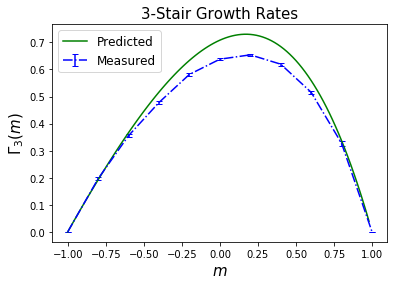

In [7]:
# Growth Rate
ms = np.arange(-1,1.2,.2)
# print(slopes1)
# print(aslopes1)
plt.errorbar(ms, np.mean(slopes3,axis=1), yerr=np.std(slopes3, axis=1)/np.sqrt(trials-1), label="Measured", fmt='-.')
# plt.plot(ms,  np.average(slopes1,axis=1), label="measured")
ms = np.arange(-1,1.0,.02)
aslopes3 = -(1/8)* (-1 + ms)* (1 + ms)* (17 + ms* (6 + ms))/3
plt.plot(ms, aslopes3, label="Predicted")
plt.title("3-Stair Growth Rates", fontsize=15)
plt.ylabel("$\Gamma_3(m)$", fontsize=15)
plt.xlabel("$m$", fontsize=15)
plt.legend(loc=2)
plt.savefig("../figures/growthrates/3stairRates.pdf")
plt.show()

# 4-Stair

In [8]:
N = 100
Steps = 2000
trials = 100
n = 4
slopes4 = np.zeros((11,trials))
ts = np.arange(Steps+1)

for t in range(trials):
    for idx, m in enumerate(np.arange(-10,12,2)):
        S = reset_S(N, m/10)
        heights = np.array([np.mean(S[:-1])])
        for i in range(Steps):
            S = stair_update_S(S, n)
            heights = np.append(heights, np.mean(S[:-1]))
        
#     plt.plot(ts, heights)
        slope, intercept,_,_,_ = stats.linregress(ts[Steps//5:],
                                              heights[Steps//5:])
#     plt.plot(ts, slope * ts + intercept)
        slopes4[idx,t] = slope*N/n
# plt.show()

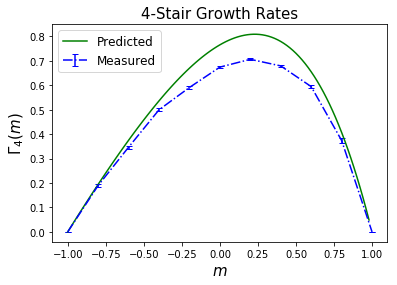

In [9]:
# Growth Rate
ms = np.arange(-1,1.2,.2)
# print(slopes1)
# print(aslopes1)
plt.errorbar(ms, np.mean(slopes4,axis=1), yerr=np.std(slopes4, axis=1)/np.sqrt(trials-1), label="Measured", fmt='-.')
# plt.plot(ms,  np.average(slopes1,axis=1), label="measured")
ms = np.arange(-1,1.0,.02)
aslopes4 = -(1/16)* (-1 + ms)* (1 + ms)* (49 + ms* (23 + ms* (7 + ms)))/4
plt.plot(ms, aslopes4, label="Predicted")
plt.title("4-Stair Growth Rates", fontsize=15)
plt.ylabel("$\Gamma_4(m)$", fontsize=15)
plt.xlabel("$m$", fontsize=15)
plt.legend(loc=2)
plt.savefig("../figures/growthrates/4stairRates.pdf")
plt.show()

# 5-Stair

In [10]:
N = 100
Steps = 2000
trials = 100
n = 5
slopes5 = np.zeros((11,trials))
ts = np.arange(Steps+1)

for t in range(trials):
    for idx, m in enumerate(np.arange(-10,12,2)):
        S = reset_S(N, m/10)
        heights = np.array([np.mean(S[:-1])])
        for i in range(Steps):
            S = stair_update_S(S, n)
            heights = np.append(heights, np.mean(S[:-1]))
        
#     plt.plot(ts, heights)
        slope, intercept,_,_,_ = stats.linregress(ts[Steps//5:],
                                              heights[Steps//5:])
#     plt.plot(ts, slope * ts + intercept)
        slopes5[idx,t] = slope*N/n
# plt.show()

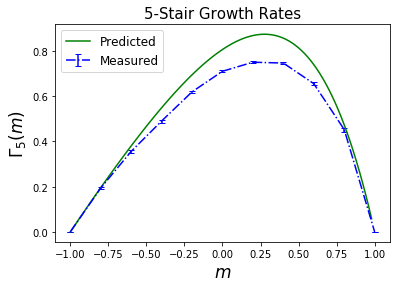

In [11]:
# Growth Rate
ms = np.arange(-1,1.2,.2)
# print(slopes1)
# print(aslopes1)
plt.errorbar(ms, np.mean(slopes5,axis=1), yerr=np.std(slopes5, axis=1)/np.sqrt(trials-1), label="Measured", fmt='-.')
# plt.plot(ms,  np.average(slopes1,axis=1), label="measured")
ms = np.arange(-1,1.0,.02)
aslopes5 = -(1/32)* (-1 + ms)* (1 + ms)* (129 + ms* (72 + ms* (30 + ms* (8 + ms))))/5
plt.plot(ms, aslopes5, label="Predicted")
plt.title("5-Stair Growth Rates", fontsize=15)
plt.ylabel("$\Gamma_5(m)$", fontsize=17)
plt.xlabel("$m$", fontsize=17)
plt.legend(loc=2)
plt.savefig("../figures/growthrates/5stairRates.pdf")
plt.show()

# 6-Stairs

In [12]:
N = 100
Steps = 2000
trials = 100
n = 6
slopes6 = np.zeros((11,trials))
ts = np.arange(Steps+1)

for t in range(trials):
    for idx, m in enumerate(np.arange(-10,12,2)):
        S = reset_S(N, m/10)
        heights = np.array([np.mean(S[:-1])])
        for i in range(Steps):
            S = stair_update_S(S, n)
            heights = np.append(heights, np.mean(S[:-1]))
        
#     plt.plot(ts, heights)
        slope, intercept,_,_,_ = stats.linregress(ts[Steps//5:],
                                              heights[Steps//5:])
#     plt.plot(ts, slope * ts + intercept)
        slopes6[idx,t] = slope*N/n
# plt.show()

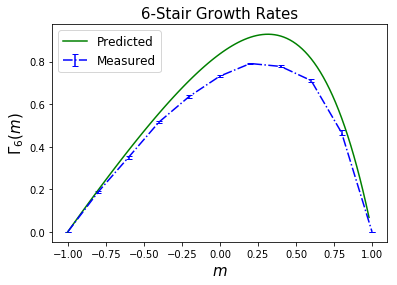

In [13]:
# Growth Rate
ms = np.arange(-1,1.2,.2)
# print(slopes1)
# print(aslopes1)
plt.errorbar(ms, np.mean(slopes6,axis=1), yerr=np.std(slopes6, axis=1)/np.sqrt(trials-1), label="Measured", fmt='-.')
# plt.plot(ms,  np.average(slopes1,axis=1), label="measured")
ms = np.arange(-1,1.0,.02)
aslopes6 = (6 + 6*ms - (1 + ms)**2/2. - (1 + ms)**3/4. - (1 + ms)**4/8. - 
            (1 + ms)**5/16. - (1 + ms)**6/32. - (1 + ms)**7/64.)/6.
plt.plot(ms, aslopes6, label="Predicted")
plt.title("6-Stair Growth Rates", fontsize=15)
plt.ylabel("$\Gamma_6(m)$", fontsize=15)
plt.xlabel("$m$", fontsize=15)
plt.legend(loc=2)
plt.savefig("../figures/growthrates/6stairRates.pdf")
plt.show()

# All lengths

In [4]:
[slopes1, slopes2, slopes3, slopes4, slopes5, slopes6] = np.load('data/nStairRates.npy')
trials = 100

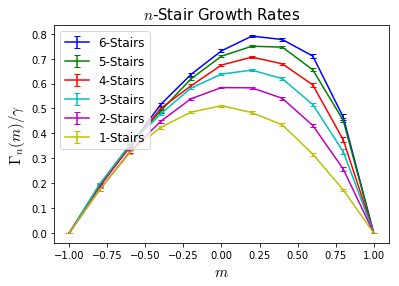

In [5]:
# Growth Rate
ms = np.arange(-1,1.2,.2)

plt.errorbar(ms, np.mean(slopes6,axis=1), yerr=np.std(slopes6, axis=1)/np.sqrt(trials-1), label="6-Stairs", fmt='-')
plt.errorbar(ms, np.mean(slopes5,axis=1), yerr=np.std(slopes5, axis=1)/np.sqrt(trials-1), label="5-Stairs", fmt='-')
plt.errorbar(ms, np.mean(slopes4,axis=1), yerr=np.std(slopes4, axis=1)/np.sqrt(trials-1), label="4-Stairs", fmt='-')
plt.errorbar(ms, np.mean(slopes3,axis=1), yerr=np.std(slopes3, axis=1)/np.sqrt(trials-1), label="3-Stairs", fmt='-')
plt.errorbar(ms, np.mean(slopes2,axis=1), yerr=np.std(slopes2, axis=1)/np.sqrt(trials-1), label="2-Stairs", fmt='-')
plt.errorbar(ms, np.mean(slopes1,axis=1), yerr=np.std(slopes1, axis=1)/np.sqrt(trials-1), label="1-Stairs", fmt='-')


plt.title("$n$-Stair Growth Rates", fontsize=15)
plt.ylabel("$\Gamma_n(m)/\gamma$", fontsize=15)
plt.xlabel("$m$", fontsize=15)
plt.legend(loc=2)
plt.savefig("../figures/growthrates/compareRates.pdf")
plt.show()

In [19]:
np.save('data/nStairRates', [slopes1, slopes2, slopes3, slopes4, slopes5, slopes6])

# Percent difference

In [15]:
diffs = np.zeros(6)
for i in [1,3,5,7,9]:
    diffs[0] = (np.mean(slopes1[i,:]) - aslopes1[10*i])/aslopes1[10*i]
    diffs[1] = (np.mean(slopes2[i,:]) - aslopes2[10*i])/aslopes1[10*i]
    diffs[2] = (np.mean(slopes3[i,:]) - aslopes3[10*i])/aslopes1[10*i]
    diffs[3] = (np.mean(slopes4[i,:]) - aslopes4[10*i])/aslopes1[10*i]
    diffs[4] = (np.mean(slopes5[i,:]) - aslopes5[10*i])/aslopes1[10*i]
    diffs[5] = (np.mean(slopes6[i,:]) - aslopes6[10*i])/aslopes1[10*i]
    lens = range(1,7)
    plt.plot(lens, diffs, label="$m=$"+str(ms[10*i]-ms[50]))
plt.title("Percent Error in Growth Rate")
plt.ylabel("Percent Error")
plt.xlabel("Stair Length")
plt.legend(loc=3)
plt.savefig("../figures/growthrates/rate_errors.pdf")
plt.show()

IndexError: index 50 is out of bounds for axis 0 with size 11

# With Correlations

In [ ]:
cors2 = np.load("data/cors2.npy")
print(np.shape(cors2))

In [ ]:
ms = np.arange(-1,1.2,.2)
plt.errorbar(ms, np.mean(slopes2,axis=1), yerr=np.std(slopes2, axis=1)/np.sqrt(trials-1), label="Measured", fmt='-.')
ms = np.arange(-1,1.0,.02)
plt.plot(ms, aslopes2, label="No Correlation")
ms = np.arange(-1,1.1,.1)
c = np.average(cors2, axis=0)
better_aslopes2 = -((-1 + c + ms**2) * (c + (1 + ms) * (5 + ms)))/(8 * (1 + ms))
plt.plot(ms, better_aslopes2, label="With Correlation")
plt.title("Growth Rates With Correlation", fontsize=15)
plt.ylabel("Growth Rate", fontsize=15)
plt.xlabel("$m$", fontsize=15)
plt.legend(bbox_to_anchor=(.7,.5))
plt.savefig("../figures/growthrates/2corRates.pdf")
plt.show()

In [ ]:
ms = np.arange(-1,1.2,.2)[1:-1]
plt.plot(ms, ((np.average(slopes2, axis=1)-better_aslopes2[::2])/better_aslopes2[::2])[1:-1], label="With Correlation")
plt.plot(ms, ((np.average(slopes2, axis=1)[:-1]-aslopes2[::10])/aslopes2[::10])[1:], label="Without Correlation")
plt.title("Growth Rates Relative Error")
plt.ylim((-.08,.08))
plt.ylabel("Relative Error")
plt.xlabel("$m$")
plt.legend(loc=2)
plt.savefig("../figures/growthrates/
            
            .pdf")
plt.show()

In [ ]:
(np.average(slopes2, axis=1)-better_aslopes2[::2])/better_aslopes2[::2]